<a href="https://colab.research.google.com/github/mlaricobar/solution-datathon-interbank-2020/blob/desarrollo/%5B03%5D%20Feature%20Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering

In [1]:
from google.colab import drive, files

import pandas as pd

import seaborn as sns
from datetime import datetime
from dateutil import relativedelta
import matplotlib.pyplot as plt

In [2]:
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [3]:
%cd /gdrive/'My Drive'/Competencias/'[02] Interbank-2020'
!ls -lh '[00] Data'

/gdrive/My Drive/Competencias/[02] Interbank-2020
total 5.1G
-rw------- 1 root root 979M Dec 12 01:33 censo_test.csv
-rw------- 1 root root 748M Dec 12 01:34 censo_train.csv
-rw------- 1 root root  998 Dec 12 01:34 productos.csv
-rw------- 1 root root 1.7G Dec 12 01:34 rcc_test.csv
-rw------- 1 root root 1.4G Dec 12 01:35 rcc_train.csv
-rw------- 1 root root 3.3M Dec 12 01:35 sample_submission.csv
-rw------- 1 root root  30M Dec 12 01:35 se_test.csv
-rw------- 1 root root  28M Dec 12 01:35 se_train.csv
-rw------- 1 root root 122M Dec 12 01:35 sunat_test.csv
-rw------- 1 root root 106M Dec 12 01:35 sunat_train.csv
-rw------- 1 root root 3.0M Dec 12 01:35 y_train.csv


In [4]:
def optimizar_df(df):
  for col_ in df.select_dtypes(include=[int]).columns:
    df[col_] = pd.to_numeric(df[col_], downcast="unsigned")

  for col_ in df.select_dtypes(include=[float]).columns:
    df[col_] = pd.to_numeric(df[col_], downcast="float")
  
  return df

## Dataset Base

In [5]:
df_base_train = optimizar_df(pd.read_csv("[00] Data/y_train.csv"))
df_base_test = optimizar_df(pd.read_csv("[00] Data/sample_submission.csv"))

## Dataset Socio-Demográfico

In [6]:
df_se_train = optimizar_df(pd.read_csv("[00] Data/se_train.csv"))
df_se_test = optimizar_df(pd.read_csv("[00] Data/se_test.csv"))

In [ ]:
df_se_train.to_csv("[01] Intermediate/ds_se.csv", index=False)
df_se_test.to_csv("[01] Intermediate/ds_se_test.csv", index=False)

## Dataset RCC

In [6]:
df_rcc_train = optimizar_df(pd.read_csv("[00] Data/rcc_train.csv"))
df_rcc_test = optimizar_df(pd.read_csv("[00] Data/rcc_test.csv"))

In [7]:
df_rcc_train["saldo"] = df_rcc_train["saldo"] + 1
df_rcc_test["saldo"] = df_rcc_test["saldo"] + 1

In [8]:
def diff_months(codmes_ini, codmes_fin):
  r = relativedelta.relativedelta(datetime.strptime(str(int(codmes_fin)), '%Y%m'), datetime.strptime(str(int(codmes_ini)), '%Y%m'))
  return r.years*12 + r.months

In [9]:
df_rcc_train.head(3)

,codmes,key_value,condicion,tipo_credito,cod_instit_financiera,saldo,PRODUCTO,RIESGO_DIRECTO,COD_CLASIFICACION_DEUDOR
0,201711,4,0,12,33,0.927399,6,-1,0
1,201711,4,0,12,33,0.929392,7,-1,0
2,201711,4,0,12,61,0.947946,5,-1,0


In [9]:
#df_rcc_train["RIESGO_DIRECTO_COD_CLAS_DEUDOR"] = df_rcc_train.apply(lambda row: "{0}_{1}".format(row["RIESGO_DIRECTO"], row["COD_CLASIFICACION_DEUDOR"]), axis=1)
#df_rcc_test["RIESGO_DIRECTO_COD_CLAS_DEUDOR"] = df_rcc_test.apply(lambda row: "{0}_{1}".format(row["RIESGO_DIRECTO"], row["COD_CLASIFICACION_DEUDOR"]), axis=1)

In [13]:
from itertools import product

In [20]:
df_rcc_train.loc[~pd.notnull(df_rcc_test["RIESGO_DIRECTO"])]

,codmes,key_value,condicion,tipo_credito,cod_instit_financiera,saldo,PRODUCTO,RIESGO_DIRECTO,COD_CLASIFICACION_DEUDOR


In [12]:
[(i, j) for i, j in zip(df_rcc_train["RIESGO_DIRECTO"].unique(), df_rcc_train["COD_CLASIFICACION_DEUDOR"].unique())]

[(-1, 0), (1, 1), (2, 5), (3, 3), (5, 4)]

In [89]:
sorted(df_rcc_train["tipo_credito"].unique())

[6, 8, 9, 10, 11, 12, 13, 99]

In [90]:
sorted(df_rcc_train["RIESGO_DIRECTO"].unique())

[-1, 1, 2, 3, 5]

In [ ]:
sorted(df_rcc_test["RIESGO_DIRECTO"].unique())

In [91]:
sorted(df_rcc_train["COD_CLASIFICACION_DEUDOR"].unique())

[0, 1, 2, 3, 4, 5]

In [ ]:
sorted(df_rcc_test["COD_CLASIFICACION_DEUDOR"].unique())

In [23]:
map_dict_train = {201802: "U01M", 201801: "U02M", 201712: "U03M",
                  201711: "U04M", 201710: "U05M", 201709: "U06M",
                  201708: "U07M", 201707: "U08M", 201706: "U09M",
                  201705: "U10M", 201704: "U11M", 201703: "U12M"
                  }

map_dict_test = {201902: "U01M", 201901: "U02M", 201812: "U03M",
                  201811: "U04M", 201810: "U05M", 201809: "U06M",
                  201808: "U07M", 201807: "U08M", 201806: "U09M",
                  201805: "U10M", 201804: "U11M", 201803: "U12M"
                  }

In [90]:
combination_list = [{"RIESGO_DIRECTO": d[0], "COD_CLASIFICACION_DEUDOR": d[1]} for d in product([-1, 1, 2, 3], [0, 1, 2, 3, 4, 5])]


In [91]:
filter_col = "RIESGO_DIRECTO"
filter_value = -1

def get_features(d):
  df_rcc_train_agg_month = df_rcc_train.loc[(df_rcc_train["RIESGO_DIRECTO"] == d["RIESGO_DIRECTO"]) &
                                            (df_rcc_train["COD_CLASIFICACION_DEUDOR"] == d["COD_CLASIFICACION_DEUDOR"])]\
                                      .groupby(["key_value", "codmes"], as_index=False)\
                                      .agg({"PRODUCTO": "count"})
  
  df_rcc_test_agg_month = df_rcc_test.loc[(df_rcc_test["RIESGO_DIRECTO"] == d["RIESGO_DIRECTO"]) &
                                            (df_rcc_test["COD_CLASIFICACION_DEUDOR"] == d["COD_CLASIFICACION_DEUDOR"])]\
                                      .groupby(["key_value", "codmes"], as_index=False)\
                                      .agg({"PRODUCTO": "count"})
  
  filter_col = "RIESGO_DIRECTO_COD_CLASIFICACION_DEUDOR"
  filter_value = "{0}_{1}".format(str(d["RIESGO_DIRECTO"]), str(d["COD_CLASIFICACION_DEUDOR"]))

  if df_rcc_train_agg_month.shape[0] > 0:

    df_rcc_train_agg_month["codmes"] = df_rcc_train_agg_month["codmes"].map(map_dict_train)
    df_rcc_train_agg_month = pd.crosstab(index=[df_rcc_train_agg_month.key_value],
                                        columns=df_rcc_train_agg_month.codmes,
                                        values=df_rcc_train_agg_month["PRODUCTO"],
                                        aggfunc="sum")\
                                .reset_index(drop=False)
    
    df_rcc_test_agg_month["codmes"] = df_rcc_test_agg_month["codmes"].map(map_dict_test)
    df_rcc_test_agg_month = pd.crosstab(index=[df_rcc_test_agg_month.key_value],
                                        columns=df_rcc_test_agg_month.codmes,
                                        values=df_rcc_test_agg_month["PRODUCTO"],
                                        aggfunc="sum")\
                                .reset_index(drop=False)
    
    df_rcc_train_agg_month["NULL_COUNT_FOR_{0}_EQ_{1}".format(filter_col, filter_value)] = df_rcc_train_agg_month[[c for c in df_rcc_train_agg_month.columns if c not in ["key_value"]]].isnull().sum(axis=1)
    df_rcc_train_agg_month = df_rcc_train_agg_month.fillna(0)

    df_rcc_test_agg_month["NULL_COUNT_FOR_{0}_EQ_{1}".format(filter_col, filter_value)] = df_rcc_test_agg_month[[c for c in df_rcc_test_agg_month.columns if c not in ["key_value"]]].isnull().sum(axis=1)
    df_rcc_test_agg_month = df_rcc_test_agg_month.fillna(0)

    month_col_list = [c for c in df_rcc_train_agg_month.columns if c not in ["key_value", "codmes", "NULL_COUNT_FOR_{0}_EQ_{1}".format(filter_col, filter_value)]]

    df_rcc_train_agg_month["REAL_PRODUCT_COUNT_MEAN_FOR_{0}_EQ_{1}".format(filter_col, filter_value)] = df_rcc_train_agg_month[month_col_list].mean(axis=1)
    df_rcc_train_agg_month["REAL_PRODUCT_COUNT_STD_FOR_{0}_EQ_{1}".format(filter_col, filter_value)] = df_rcc_train_agg_month[month_col_list].std(axis=1)

    df_rcc_test_agg_month["REAL_PRODUCT_COUNT_MEAN_FOR_{0}_EQ_{1}".format(filter_col, filter_value)] = df_rcc_test_agg_month[month_col_list].mean(axis=1)
    df_rcc_test_agg_month["REAL_PRODUCT_COUNT_STD_FOR_{0}_EQ_{1}".format(filter_col, filter_value)] = df_rcc_test_agg_month[month_col_list].std(axis=1)

    out_cols = [c for c in df_rcc_train_agg_month.columns if c not in month_col_list]

    return True, df_rcc_train_agg_month[out_cols], df_rcc_test_agg_month[out_cols]
  
  else:

    return False, None, None


In [92]:
#{'RIESGO_DIRECTO': 5, 'COD_CLASIFICACION_DEUDOR': 0}
#df_rcc_test.loc[(df_rcc_test['RIESGO_DIRECTO'] == 5) & (df_rcc_test['COD_CLASIFICACION_DEUDOR'] == 0)]
#df_rcc_train.loc[(df_rcc_train['RIESGO_DIRECTO'] == 5) & (df_rcc_train['COD_CLASIFICACION_DEUDOR'] == 5)]

In [93]:
df_base_train_all = df_base_train.copy()
df_base_test_all = df_base_test.copy()

In [94]:
for i, d in enumerate(combination_list):
  print(i, combination_list[i])

  has_data, df_rcc_train_agg_month, df_rcc_test_agg_month = get_features(d)
  
  if has_data:
    df_base_train_all = df_base_train_all.merge(df_rcc_train_agg_month, how="left", on="key_value")
    df_base_test_all = df_base_test_all.merge(df_rcc_test_agg_month, how="left", on="key_value")

0 {'RIESGO_DIRECTO': -1, 'COD_CLASIFICACION_DEUDOR': 0}
1 {'RIESGO_DIRECTO': -1, 'COD_CLASIFICACION_DEUDOR': 1}
2 {'RIESGO_DIRECTO': -1, 'COD_CLASIFICACION_DEUDOR': 2}
3 {'RIESGO_DIRECTO': -1, 'COD_CLASIFICACION_DEUDOR': 3}
4 {'RIESGO_DIRECTO': -1, 'COD_CLASIFICACION_DEUDOR': 4}
5 {'RIESGO_DIRECTO': -1, 'COD_CLASIFICACION_DEUDOR': 5}
6 {'RIESGO_DIRECTO': 1, 'COD_CLASIFICACION_DEUDOR': 0}
7 {'RIESGO_DIRECTO': 1, 'COD_CLASIFICACION_DEUDOR': 1}
8 {'RIESGO_DIRECTO': 1, 'COD_CLASIFICACION_DEUDOR': 2}
9 {'RIESGO_DIRECTO': 1, 'COD_CLASIFICACION_DEUDOR': 3}
10 {'RIESGO_DIRECTO': 1, 'COD_CLASIFICACION_DEUDOR': 4}
11 {'RIESGO_DIRECTO': 1, 'COD_CLASIFICACION_DEUDOR': 5}
12 {'RIESGO_DIRECTO': 2, 'COD_CLASIFICACION_DEUDOR': 0}
13 {'RIESGO_DIRECTO': 2, 'COD_CLASIFICACION_DEUDOR': 1}
14 {'RIESGO_DIRECTO': 2, 'COD_CLASIFICACION_DEUDOR': 2}
15 {'RIESGO_DIRECTO': 2, 'COD_CLASIFICACION_DEUDOR': 3}
16 {'RIESGO_DIRECTO': 2, 'COD_CLASIFICACION_DEUDOR': 4}
17 {'RIESGO_DIRECTO': 2, 'COD_CLASIFICACION_DEUDOR':

In [101]:
df_base_train_all.to_csv("[01] Intermediate/ds_rcc_feat_combination_train.csv", index=False)
df_base_test_all.to_csv("[01] Intermediate/ds_rcc_feat_combination_test.csv", index=False)

In [100]:
#df_rcc_test.loc[(df_rcc_test["RIESGO_DIRECTO"] == 1) & (df_rcc_test["COD_CLASIFICACION_DEUDOR"] == 5)]

In [99]:
#df_base_train_all.info(null_counts=True)

In [98]:
#df_base_test_all.info(null_counts=True)

In [68]:
df_base_train_all.shape[0]

358487

In [71]:
df_base_train_all.groupby("NULL_COUNT_FOR_RIESGO_DIRECTO_COD_CLASIFICACION_DEUDOR_EQ_-1_1").agg({"target": ["mean", "count"]})

target       
                                                        mean  count
NULL_COUNT_FOR_RIESGO_DIRECTO_COD_CLASIFICACION...                 
0.0                                                 0.583333     36
1.0                                                 0.400000     45
2.0                                                 0.311111     90
3.0                                                 0.419355    186
4.0                                                 0.370629    286
5.0                                                 0.370766    561
6.0                                                 0.389744    975
7.0                                                 0.398685   1673
8.0                                                 0.360496   2982
9.0                                                 0.338791   5558
10.0                                                0.311822  11622
11.0                                                0.252155  31092

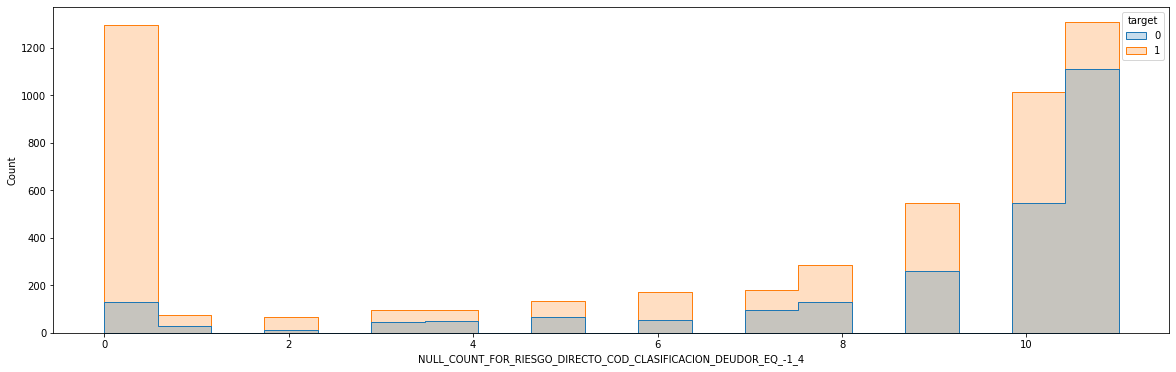

In [42]:
plt.figure(figsize=(20, 6))
sns.histplot(df_rcc_train_agg_month, x="NULL_COUNT_FOR_RIESGO_DIRECTO_COD_CLASIFICACION_DEUDOR_EQ_-1_4", hue="target", element="step")

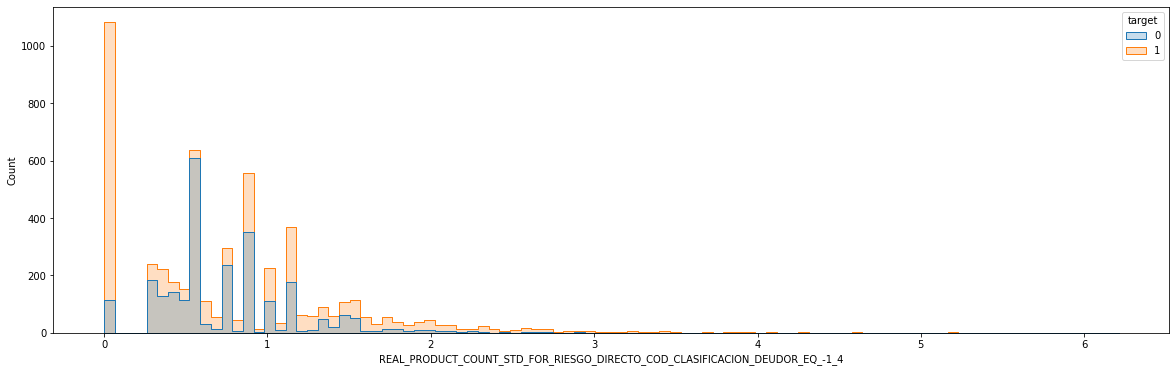

In [45]:
plt.figure(figsize=(20, 6))
sns.histplot(df_rcc_train_agg_month, x="REAL_PRODUCT_COUNT_STD_FOR_RIESGO_DIRECTO_COD_CLASIFICACION_DEUDOR_EQ_-1_4", hue="target", element="step")

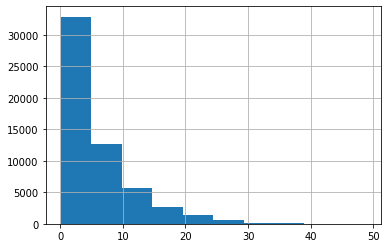

In [47]:
df_rcc_train_agg_month.loc[df_rcc_train_agg_month['target'] == 1, "REAL_PRODUCT_COUNT_MEAN"].hist()

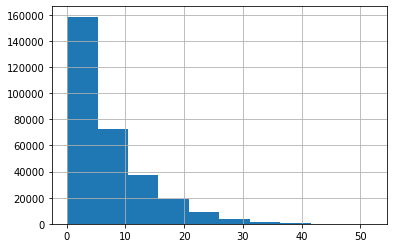

In [48]:
df_rcc_train_agg_month.loc[df_rcc_train_agg_month['target'] == 0, "REAL_PRODUCT_COUNT_MEAN"].hist()

In [14]:
df_rcc_train.groupby("codmes", as_index=False).agg({"key_value": "nunique"})

,codmes,key_value
0,201703,271195
1,201704,274087
2,201705,277157
3,201706,279899
4,201707,284332
5,201708,287315
6,201709,289606
7,201710,293824
8,201711,296166
9,201712,294880


In [21]:
df_nuevos = df_rcc_train.loc[(df_rcc_train["codmes"] == 201802) & 
                 ~(df_rcc_train["key_value"].isin(df_rcc_train.loc[df_rcc_train["codmes"] != 201802, "key_value"].unique())), ["key_value"]].drop_duplicates()

In [24]:
df_base_train["target"].mean()

0.15819262623191357

In [23]:
df_nuevos.merge(df_base_train, how="left", on="key_value").describe()

,key_value,target
count,40165.000000,40165.000000
mean,205629.781003,0.121997
std,108777.701115,0.327286
min,10.000000,0.000000
25%,110460.000000,0.000000
50%,214878.000000,0.000000
75%,307385.000000,0.000000
max,358486.000000,1.000000


In [15]:
df_rcc_test.groupby("codmes", as_index=False).agg({"key_value": "nunique"})

,codmes,key_value
0,201803,304407
1,201804,307786
2,201805,311221
3,201806,314598
4,201807,319240
5,201808,321742
6,201809,323546
7,201810,327975
8,201811,329841
9,201812,327683


In [18]:
df_rcc_test.loc[(df_rcc_test["codmes"] == 201902) & 
                 ~(df_rcc_test["key_value"].isin(df_rcc_test.loc[df_rcc_test["codmes"] != 201902, "key_value"].unique())), "key_value"].nunique()

42267

In [29]:
df_rcc_train["COD_CLASIFICACION_DEUDOR"].unique(), df_rcc_test["COD_CLASIFICACION_DEUDOR"].unique()

(array([1, 2, 6, 4, 5, 3], dtype=uint8),
 array([1, 2, 6, 4, 3, 5], dtype=uint8))

In [30]:
df_rcc_train["RIESGO_DIRECTO"].unique(), df_rcc_test["RIESGO_DIRECTO"].unique()

(array([1, 3, 4, 5, 7]), array([1, 3, 4, 5, 7]))

In [28]:
df_rcc_train["COD_CLASIFICACION_DEUDOR"] = df_rcc_train["COD_CLASIFICACION_DEUDOR"] + 1
df_rcc_train["RIESGO_DIRECTO"] = df_rcc_train["RIESGO_DIRECTO"] + 2

df_rcc_test["COD_CLASIFICACION_DEUDOR"] = df_rcc_test["COD_CLASIFICACION_DEUDOR"] + 1
df_rcc_test["RIESGO_DIRECTO"] = df_rcc_test["RIESGO_DIRECTO"] + 2

### Historical Features

In [31]:
from scipy.stats import hmean, gmean, kurtosis, skew, entropy

#### Count, sum, min, max, mean

In [32]:
df_rcc_train_agg = (df_rcc_train.groupby(["key_value", "codmes"], as_index=False)
                                .agg({
                                        "saldo": ["count", "sum", "min", "max", "mean"],
                                        "condicion": ["sum", "min", "max", "mean"],
                                        "COD_CLASIFICACION_DEUDOR": ["sum", "min", "max", "mean"],
                                        "RIESGO_DIRECTO": ["sum", "min", "max", "mean"],
                                }))

In [33]:
df_rcc_test_agg = (df_rcc_test.groupby(["key_value", "codmes"], as_index=False)
                                .agg({
                                        "saldo": ["count", "sum", "min", "max", "mean"],
                                        "condicion": ["sum", "min", "max", "mean"],
                                        "COD_CLASIFICACION_DEUDOR": ["sum", "min", "max", "mean"],
                                        "RIESGO_DIRECTO": ["sum", "min", "max", "mean"],
                                }))

In [34]:
df_rcc_train_agg.columns = ["_".join(c) if c[-1] != "" else c[0] for c in df_rcc_train_agg.columns]
df_rcc_test_agg.columns = ["_".join(c) if c[-1] != "" else c[0] for c in df_rcc_test_agg.columns]

In [35]:
df_rcc_train_agg.head()

,key_value,codmes,saldo_count,saldo_sum,saldo_min,saldo_max,saldo_mean,condicion_sum,condicion_min,condicion_max,condicion_mean,COD_CLASIFICACION_DEUDOR_sum,COD_CLASIFICACION_DEUDOR_min,COD_CLASIFICACION_DEUDOR_max,COD_CLASIFICACION_DEUDOR_mean,RIESGO_DIRECTO_sum,RIESGO_DIRECTO_min,RIESGO_DIRECTO_max,RIESGO_DIRECTO_mean
0,0,201703,4,3.777921,0.927186,0.961819,0.944480,0,0,0,0.0,4.0,1,1,1.0,6,1,3,1.5
1,0,201704,5,4.705365,0.927186,0.961819,0.941073,0,0,0,0.0,5.0,1,1,1.0,7,1,3,1.4
2,0,201705,5,4.705208,0.927186,0.961819,0.941042,0,0,0,0.0,5.0,1,1,1.0,7,1,3,1.4
3,0,201706,5,4.705231,0.927186,0.961819,0.941046,0,0,0,0.0,5.0,1,1,1.0,7,1,3,1.4
4,0,201707,5,4.705533,0.927186,0.961819,0.941107,0,0,0,0.0,5.0,1,1,1.0,7,1,3,1.4


In [36]:
col_num = [c for c in df_rcc_train_agg.columns if c not in ["key_value", "codmes"]]
#['saldo_count', 'saldo_sum', 'saldo_min', 'saldo_max', 'saldo_mean', 'condicion_sum', 'condicion_min', 'condicion_max', 'condicion_mean']

In [37]:
import time

In [ ]:
for col_ in col_num:
    print("Numeric Feature: {0}".format(col_))
    ti = time.time()
    df_rcc_train_agg["last{0}".format(col_)] = df_rcc_train_agg.groupby("key_value")[col_].shift(1)
    df_rcc_test_agg["last{0}".format(col_)] = df_rcc_test_agg.groupby("key_value")[col_].shift(1)
  
    if col_ == "codmes":
        df_rcc_train_agg["difflast{0}".format(col_)] = df_rcc_train_agg.apply(lambda row: diff_months(row["last{0}".format(col_)], row[col_]), axis=1)
        df_rcc_test_agg["difflast{0}".format(col_)] = df_rcc_test_agg.apply(lambda row: diff_months(row["last{0}".format(col_)], row[col_]), axis=1)
    else:
        df_rcc_train_agg["difflast{0}".format(col_)] = df_rcc_train_agg.apply(lambda row: row[col_] - row["last{0}".format(col_)], axis=1)
        df_rcc_test_agg["difflast{0}".format(col_)] = df_rcc_test_agg.apply(lambda row: row[col_] - row["last{0}".format(col_)], axis=1)
  
    df_rcc_train_agg["absdifflast{0}".format(col_)] = abs(df_rcc_train_agg["difflast{0}".format(col_)])
    df_rcc_test_agg["absdifflast{0}".format(col_)] = abs(df_rcc_test_agg["difflast{0}".format(col_)])

    df_rcc_train_agg.loc[pd.notnull(df_rcc_train_agg["difflast{0}".format(col_)]), "incrflag{0}".format(col_)] = df_rcc_train_agg.loc[pd.notnull(df_rcc_train_agg["difflast{0}".format(col_)]), "difflast{0}".format(col_)].apply(lambda c: 1 if c > 0 else 0)
    df_rcc_train_agg.loc[pd.notnull(df_rcc_train_agg["difflast{0}".format(col_)]), "decrflag{0}".format(col_)] = df_rcc_train_agg.loc[pd.notnull(df_rcc_train_agg["difflast{0}".format(col_)]), "difflast{0}".format(col_)].apply(lambda c: 1 if c < 0 else 0)
    df_rcc_train_agg.loc[pd.notnull(df_rcc_train_agg["difflast{0}".format(col_)]), "sameflag{0}".format(col_)] = df_rcc_train_agg.loc[pd.notnull(df_rcc_train_agg["difflast{0}".format(col_)]), "difflast{0}".format(col_)].apply(lambda c: 1 if c == 0 else 0)

    df_rcc_test_agg.loc[pd.notnull(df_rcc_test_agg["difflast{0}".format(col_)]), "incrflag{0}".format(col_)] = df_rcc_test_agg.loc[pd.notnull(df_rcc_test_agg["difflast{0}".format(col_)]), "difflast{0}".format(col_)].apply(lambda c: 1 if c > 0 else 0)
    df_rcc_test_agg.loc[pd.notnull(df_rcc_test_agg["difflast{0}".format(col_)]), "decrflag{0}".format(col_)] = df_rcc_test_agg.loc[pd.notnull(df_rcc_test_agg["difflast{0}".format(col_)]), "difflast{0}".format(col_)].apply(lambda c: 1 if c < 0 else 0)
    df_rcc_test_agg.loc[pd.notnull(df_rcc_test_agg["difflast{0}".format(col_)]), "sameflag{0}".format(col_)] = df_rcc_test_agg.loc[pd.notnull(df_rcc_test_agg["difflast{0}".format(col_)]), "difflast{0}".format(col_)].apply(lambda c: 1 if c == 0 else 0)

    tf = time.time()
    print("\tCalculo de variables en {0:.2f} segundos.".format(tf-ti))

Numeric Feature: saldo_count
	Calculo de variables en 103.53 segundos.
Numeric Feature: saldo_sum
	Calculo de variables en 102.50 segundos.
Numeric Feature: saldo_min
	Calculo de variables en 102.55 segundos.
Numeric Feature: saldo_max
	Calculo de variables en 103.96 segundos.
Numeric Feature: saldo_mean
	Calculo de variables en 106.37 segundos.
Numeric Feature: condicion_sum
	Calculo de variables en 109.15 segundos.
Numeric Feature: condicion_min
	Calculo de variables en 107.45 segundos.
Numeric Feature: condicion_max
	Calculo de variables en 112.78 segundos.
Numeric Feature: condicion_mean
	Calculo de variables en 115.14 segundos.
Numeric Feature: COD_CLASIFICACION_DEUDOR_sum
	Calculo de variables en 129.62 segundos.
Numeric Feature: COD_CLASIFICACION_DEUDOR_max


In [ ]:
df_rcc_train_agg.head(5)

In [ ]:
c_month = {"codmes": ["count", "first", "last"]}
c_dict = {c: ["sum", "mean", "std", "min", "max", "first", "last"] for c in col_num}
c_grow_dict = {c: ["sum", "mean", "std", "min", "max", "first", "last"] for c in df_rcc_train_agg.columns if (('incrflag' in c) or ('decrflag' in c))}
c_abs_diff_dict = {c: ["sum", "mean", "std", "min", "max", "first", "last"] for c in df_rcc_train_agg.columns if 'absdiff' in c}

all_dict = {}

all_dict.update(c_month)
all_dict.update(c_dict)
all_dict.update(c_grow_dict)
all_dict.update(c_abs_diff_dict)

In [ ]:
	codmes	key_value
0	201703	271195
1	201704	274087
2	201705	277157
3	201706	279899
4	201707	284332
5	201708	287315
6	201709	289606
7	201710	293824
8	201711	296166
9	201712	294880
10	201801	294427
11	201802	358487

In [ ]:
n_months = 12
n_months_dict = {1: {"train": [201802], "test": [201802]},
                 2: {"train": [201802, 201801], "test": [201902, 201901]},
                 4: {"train": [201802, 201801, 201712, 201711], "test": [201902, 201901, 201812, 201811]},
                 6: {"train": [201802, 201801, 201712, 201711, 201710, 201709], "test": [201902, 201901, 201812, 201811, 201810, 201809]},
                 12: {"train": [201802, 201801, 201712, 201711, 201710, 201709, 201708, 201707, 201706, 201705, 201704, 201703], 
                      "test": [201902, 201901, 201812, 201811, 201810, 201809, 201808, 201807, 201806, 201805, 201804, 201803]
                      }
                 }

def get_hist_features(n_months):
  prefix_ = "U{0}M_".format(n_months)

  df_rcc_train_agg_all = df_rcc_train_agg.loc[df_rcc_train_agg["codmes"].isin(n_months_dict[n_months]["train"])].groupby("key_value", as_index=False).agg(c_dict)
  df_rcc_train_agg_all.columns = [prefix_ + "_".join(c) if c[-1] != '' else c[0] for c in df_rcc_train_agg_all.columns]

  df_rcc_test_agg_all = df_rcc_test_agg.loc[df_rcc_test_agg["codmes"].isin(n_months_dict[n_months]["test"])].groupby("key_value", as_index=False).agg(c_dict)
  df_rcc_test_agg_all.columns = [prefix_ + "_".join(c) if c[-1] != '' else c[0] for c in df_rcc_test_agg_all.columns]

  
  df_rcc_train_agg_all[prefix_ + "diff_codmes_first"] = df_rcc_train_agg_all[prefix_ + "codmes_first"].apply(lambda m: diff_months(c, 201802))
  df_rcc_train_agg_all[prefix_ + "diff_codmes_last"] = df_rcc_train_agg_all[prefix_ + "codmes_last"].apply(lambda m: diff_months(c, 201802))
  
  df_rcc_test_agg_all[prefix_ + "diff_codmes_first"] = df_rcc_test_agg_all[prefix_ + "codmes_first"].apply(lambda m: diff_months(c, 201902))
  df_rcc_test_agg_all[prefix_ + "diff_codmes_last"] = df_rcc_test_agg_all[prefix_ + "codmes_last"].apply(lambda m: diff_months(c, 201902))

  del df_rcc_train_agg_all[prefix_ + "codmes_first"]
  del df_rcc_train_agg_all[prefix_ + "codmes_last"]
  del df_rcc_test_agg_all[prefix_ + "codmes_last"]
  del df_rcc_test_agg_all[prefix_ + "codmes_last"]

  return df_rcc_train_agg_all, df_rcc_test_agg_all

In [ ]:
df_rcc_u1m = get_hist_features()

In [ ]:
df_rcc_train_agg_all.head()

,key_value,U12M_saldo_count_sum,U12M_saldo_count_mean,U12M_saldo_count_std,U12M_saldo_count_min,U12M_saldo_count_max,U12M_saldo_count_first,U12M_saldo_count_last,U12M_saldo_sum_sum,U12M_saldo_sum_mean,U12M_saldo_sum_std,U12M_saldo_sum_min,U12M_saldo_sum_max,U12M_saldo_sum_first,U12M_saldo_sum_last,U12M_saldo_min_sum,U12M_saldo_min_mean,U12M_saldo_min_std,U12M_saldo_min_min,U12M_saldo_min_max,U12M_saldo_min_first,U12M_saldo_min_last,U12M_saldo_max_sum,U12M_saldo_max_mean,U12M_saldo_max_std,U12M_saldo_max_min,U12M_saldo_max_max,U12M_saldo_max_first,U12M_saldo_max_last,U12M_saldo_mean_sum,U12M_saldo_mean_mean,U12M_saldo_mean_std,U12M_saldo_mean_min,U12M_saldo_mean_max,U12M_saldo_mean_first,U12M_saldo_mean_last,U12M_condicion_sum_sum,U12M_condicion_sum_mean,U12M_condicion_sum_std,U12M_condicion_sum_min,...,U12M_absdifflastsaldo_max_std,U12M_absdifflastsaldo_max_min,U12M_absdifflastsaldo_max_max,U12M_absdifflastsaldo_max_first,U12M_absdifflastsaldo_max_last,U12M_absdifflastsaldo_mean_sum,U12M_absdifflastsaldo_mean_mean,U12M_absdifflastsaldo_mean_std,U12M_absdifflastsaldo_mean_min,U12M_absdifflastsaldo_mean_max,U12M_absdifflastsaldo_mean_first,U12M_absdifflastsaldo_mean_last,U12M_absdifflastcondicion_sum_sum,U12M_absdifflastcondicion_sum_mean,U12M_absdifflastcondicion_sum_std,U12M_absdifflastcondicion_sum_min,U12M_absdifflastcondicion_sum_max,U12M_absdifflastcondicion_sum_first,U12M_absdifflastcondicion_sum_last,U12M_absdifflastcondicion_min_sum,U12M_absdifflastcondicion_min_mean,U12M_absdifflastcondicion_min_std,U12M_absdifflastcondicion_min_min,U12M_absdifflastcondicion_min_max,U12M_absdifflastcondicion_min_first,U12M_absdifflastcondicion_min_last,U12M_absdifflastcondicion_max_sum,U12M_absdifflastcondicion_max_mean,U12M_absdifflastcondicion_max_std,U12M_absdifflastcondicion_max_min,U12M_absdifflastcondicion_max_max,U12M_absdifflastcondicion_max_first,U12M_absdifflastcondicion_max_last,U12M_absdifflastcondicion_mean_sum,U12M_absdifflastcondicion_mean_mean,U12M_absdifflastcondicion_mean_std,U12M_absdifflastcondicion_mean_min,U12M_absdifflastcondicion_mean_max,U12M_absdifflastcondicion_mean_first,U12M_absdifflastcondicion_mean_last
0,0,53,4.416667,1.164500,3,7,4,7,50.948174,4.245681,1.082779,2.984509,6.829334,3.777921,6.829334,11.232015,0.936001,0.015573,0.927141,0.961819,0.927186,0.927141,12.172789,1.014399,0.055023,0.961819,1.072672,0.961819,1.062438,11.576217,0.964685,0.024947,0.941042,0.998158,0.944480,0.975619,0.0,0.000,0.000000,0,...,0.033085,0.000000,0.110853,0.000000,0.001568,0.113586,0.010326,0.012779,0.000005,0.039933,0.003407,0.019217,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.000000
1,1,8,2.666667,1.154701,2,4,2,4,7.459759,2.486586,1.076292,1.864763,3.729381,1.865614,3.729381,2.781715,0.927238,0.000104,0.927119,0.927309,0.927309,0.927119,2.814154,0.938051,0.000499,0.937476,0.938372,0.938305,0.938372,2.797534,0.932511,0.000257,0.932345,0.932807,0.932807,0.932345,0.0,0.000,0.000000,0,...,0.000048,0.000829,0.000896,0.000829,0.000896,0.000462,0.000231,0.000275,0.000036,0.000426,0.000426,0.000036,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.000000
2,2,6,3.000000,0.000000,3,3,3,3,5.636907,2.818454,0.044070,2.787292,2.849616,2.787292,2.849616,1.854238,0.927119,0.000000,0.927119,0.927119,0.927119,0.927119,1.928230,0.964115,0.044038,0.932975,0.995254,0.932975,0.995254,1.878969,0.939484,0.014690,0.929097,0.949872,0.929097,0.949872,0.0,0.000,0.000000,0,...,NaN,0.062279,0.062279,0.062279,0.062279,0.020775,0.020775,NaN,0.020775,0.020775,0.020775,0.020775,0.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.000000,0.00000,NaN,0.0,0.000000,0.0,0.000000
3,3,7,3.500000,0.707107,3,4,4,3,7.193806,3.596903,0.678201,3.117342,4.076464,4.076464,3.117342,1.856030,0.928015,0.001140,0.927209,0.92882

In [ ]:
df_rcc_train_agg_all["U12M_codmes_last"]

0         201802
1         201802
2         201802
3         201802
4         201802
           ...  
358482    201802
358483    201802
358484    201802
358485    201802
358486    201802
Name: U12M_codmes_last, Length: 358487, dtype: uint64

In [ ]:
df_rcc_test_agg_all.head()

,key_value,U12M_saldo_count_sum,U12M_saldo_count_mean,U12M_saldo_count_std,U12M_saldo_count_min,U12M_saldo_count_max,U12M_saldo_count_first,U12M_saldo_count_last,U12M_saldo_sum_sum,U12M_saldo_sum_mean,U12M_saldo_sum_std,U12M_saldo_sum_min,U12M_saldo_sum_max,U12M_saldo_sum_first,U12M_saldo_sum_last,U12M_saldo_min_sum,U12M_saldo_min_mean,U12M_saldo_min_std,U12M_saldo_min_min,U12M_saldo_min_max,U12M_saldo_min_first,U12M_saldo_min_last,U12M_saldo_max_sum,U12M_saldo_max_mean,U12M_saldo_max_std,U12M_saldo_max_min,U12M_saldo_max_max,U12M_saldo_max_first,U12M_saldo_max_last,U12M_saldo_mean_sum,U12M_saldo_mean_mean,U12M_saldo_mean_std,U12M_saldo_mean_min,U12M_saldo_mean_max,U12M_saldo_mean_first,U12M_saldo_mean_last,U12M_condicion_sum_sum,U12M_condicion_sum_mean,U12M_condicion_sum_std,U12M_condicion_sum_min,...,U12M_absdifflastsaldo_max_std,U12M_absdifflastsaldo_max_min,U12M_absdifflastsaldo_max_max,U12M_absdifflastsaldo_max_first,U12M_absdifflastsaldo_max_last,U12M_absdifflastsaldo_mean_sum,U12M_absdifflastsaldo_mean_mean,U12M_absdifflastsaldo_mean_std,U12M_absdifflastsaldo_mean_min,U12M_absdifflastsaldo_mean_max,U12M_absdifflastsaldo_mean_first,U12M_absdifflastsaldo_mean_last,U12M_absdifflastcondicion_sum_sum,U12M_absdifflastcondicion_sum_mean,U12M_absdifflastcondicion_sum_std,U12M_absdifflastcondicion_sum_min,U12M_absdifflastcondicion_sum_max,U12M_absdifflastcondicion_sum_first,U12M_absdifflastcondicion_sum_last,U12M_absdifflastcondicion_min_sum,U12M_absdifflastcondicion_min_mean,U12M_absdifflastcondicion_min_std,U12M_absdifflastcondicion_min_min,U12M_absdifflastcondicion_min_max,U12M_absdifflastcondicion_min_first,U12M_absdifflastcondicion_min_last,U12M_absdifflastcondicion_max_sum,U12M_absdifflastcondicion_max_mean,U12M_absdifflastcondicion_max_std,U12M_absdifflastcondicion_max_min,U12M_absdifflastcondicion_max_max,U12M_absdifflastcondicion_max_first,U12M_absdifflastcondicion_max_last,U12M_absdifflastcondicion_mean_sum,U12M_absdifflastcondicion_mean_mean,U12M_absdifflastcondicion_mean_std,U12M_absdifflastcondicion_mean_min,U12M_absdifflastcondicion_mean_max,U12M_absdifflastcondicion_mean_first,U12M_absdifflastcondicion_mean_last
0,0,208,17.333333,3.420083,11,22,11,15,201.109909,16.759159,3.238173,10.688168,21.142704,10.688168,14.645761,11.127208,0.927267,0.000259,0.927119,0.927959,0.927959,0.927119,12.737703,1.061475,0.000000,1.061475,1.061475,1.061475,1.061475,11.611557,0.967630,0.005013,0.961032,0.976384,0.971652,0.976384,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.050091,0.004554,0.003691,0.000022,0.012165,0.001888,0.012165,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
1,1,59,4.916667,1.240112,4,7,4,6,55.991013,4.665917,1.208720,3.772200,6.703029,3.775212,5.835804,11.130399,0.927533,0.000287,0.927186,0.927836,0.927836,0.927488,11.900627,0.991719,0.055229,0.962805,1.130898,0.962805,1.130898,11.372097,0.947675,0.009133,0.940894,0.972634,0.943803,0.972634,72.0,6.000000,20.784610,0.0,...,0.054286,0.000000,0.160099,0.000000,0.160099,0.063059,0.005733,0.008886,0.000000,0.028768,0.000000,0.028768,144.0,13.090909,29.125434,0.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,4.363636,9.708478,0.0,24.0,0.0,0.0,28.800000,2.618182,5.825087,0.0,14.400000,0.0,0.000000
2,2,90,7.500000,1.445998,6,9,6,8,84.988724,7.082393,1.333476,5.714930,8.528098,5.715031,7.484953,11.127477,0.927290,0.000193,0.927108,0.927701,0.927220,0.927108,11.729946,0.977496,0.024818,0.942784,0.994291,0.994291,0.945023,11.342265,0.945189,0.008341,0.932663,0.952522,0.952505,0.935619,0.0,0.000000,0.000000,0.0,...,0.015477,0.000000,0.051508,0.000000,0.000000,0.022917,0.002083,0.004017,0.000007,0.013313,0.000007,0.001025,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
3,3,180,15.000000,1.758098,12,17,17,13,170.475616,14.206302,1.

In [ ]:
df_rcc_train_agg_all.to_csv("[01] Intermediate/ds_rcc_feat_hist_train.csv", index=False)
df_rcc_test_agg_all.to_csv("[01] Intermediate/ds_rcc_feat_hist_test.csv", index=False)

In [ ]:
def hist_feat_generator_per_cat(cat_col, numeric_value, agg_func, df_base, df_base_test):

  df_rcc_crosstab = (pd.crosstab(index=[df_rcc_train.key_value, df_rcc_train.codmes], 
                                columns=df_rcc_train[cat_col], 
                                values=df_rcc_train[numeric_value],
                                aggfunc=agg_func)
                      .reset_index(drop=False)
                      .reset_index(drop=True))
  df_rcc_crosstab.columns = ["{0}_{1}_FOR_{2}_{3}".format(numeric_value.upper(), agg_func.upper(), cat_col, c) if c not in ["key_value", "codmes"] else c for c in df_rcc_crosstab.columns]

  feat_cols = [c for c in df_rcc_crosstab.columns if "{0}_".format(cat_col) in c]
  df_rcc_crosstab["MEAN_OF_{0}_{1}_FOR_ALL_{2}".format(numeric_value.upper(), agg_func.upper(), cat_col)] = df_rcc_crosstab[feat_cols].mean(axis=1)
  df_rcc_crosstab["SUM_OF_{0}_{1}_FOR_ALL_{2}".format(numeric_value.upper(), agg_func.upper(), cat_col)] = df_rcc_crosstab[feat_cols].sum(axis=1)
  df_rcc_crosstab["COUNT_OF_{0}_{1}_FOR_ALL_{2}".format(numeric_value.upper(), agg_func.upper(), cat_col)] = df_rcc_crosstab[feat_cols].count(axis=1)

  df_rcc_test_crosstab = (pd.crosstab(index=[df_rcc_test.key_value, df_rcc_test.codmes], 
                                columns=df_rcc_test[cat_col], 
                                values=df_rcc_test[numeric_value],
                                aggfunc=agg_func)
                      .reset_index(drop=False)
                      .reset_index(drop=True))
  df_rcc_test_crosstab.columns = ["{0}_{1}_FOR_{2}_{3}".format(numeric_value.upper(), agg_func.upper(), cat_col, c) if c not in ["key_value", "codmes"] else c for c in df_rcc_test_crosstab.columns]

  feat_cols = [c for c in df_rcc_test_crosstab.columns if "{0}_".format(cat_col) in c]
  df_rcc_test_crosstab["MEAN_OF_{0}_{1}_FOR_ALL_{2}".format(numeric_value.upper(), agg_func.upper(), cat_col)] = df_rcc_test_crosstab[feat_cols].mean(axis=1)
  df_rcc_test_crosstab["SUM_OF_{0}_{1}_FOR_ALL_{2}".format(numeric_value.upper(), agg_func.upper(), cat_col)] = df_rcc_test_crosstab[feat_cols].sum(axis=1)
  df_rcc_test_crosstab["COUNT_OF_{0}_{1}_FOR_ALL_{2}".format(numeric_value.upper(), agg_func.upper(), cat_col)] = df_rcc_test_crosstab[feat_cols].count(axis=1)

  agg_col_dict = {"codmes": ["last", "first"]}
  agg_col_dict.update({c: ["mean", "sum", "count"] for c in df_rcc_crosstab.columns if c not in ["key_value", "codmes"]})

  for month_level in ["U03M", "U06M", "U12M"]:
    print("\t\t\tFeatures at month level: {0}".format(month_level))
    df_rcc_agg = (df_rcc_crosstab.loc[df_rcc_crosstab["codmes"].isin(month_dict[month_level])]
                                .groupby(["key_value"], as_index=False)
                                .agg(agg_col_dict)
                    )
    df_rcc_agg.columns = [month_level + "_" + "_".join(c).upper() if c[-1] != "" else c[0] for c in df_rcc_agg.columns]

    df_rcc_agg["{0}_RECENCY_FOR_{1}".format(month_level, cat_col)] = df_rcc_agg.apply(lambda row: diff_months(row["{0}_CODMES_LAST".format(month_level)], 201803), axis=1)
    df_rcc_agg["{0}_LONG_RECENCY_FOR_{1}".format(month_level, cat_col)] = df_rcc_agg.apply(lambda row: diff_months(row["{0}_CODMES_FIRST".format(month_level)], 201803), axis=1)
    df_rcc_agg["{0}_DIFF_MONTHS_FIRST_LAST_FOR_{1}".format(month_level, cat_col)] = df_rcc_agg.apply(lambda row: diff_months(row["{0}_CODMES_FIRST".format(month_level)], row["{0}_CODMES_LAST".format(month_level)]), axis=1)
    del df_rcc_agg["{0}_CODMES_FIRST".format(month_level, cat_col)]
    del df_rcc_agg["{0}_CODMES_LAST".format(month_level, cat_col)]

    df_rcc_test_agg = (df_rcc_test_crosstab.loc[df_rcc_test_crosstab["codmes"].isin(month_dict_test[month_level])]
                                .groupby(["key_value"], as_index=False)
                                .agg(agg_col_dict)
                       )
    df_rcc_test_agg.columns = [month_level + "_" + "_".join(c).upper() if c[-1] != "" else c[0] for c in df_rcc_test_agg.columns]
    
    df_rcc_test_agg["{0}_RECENCY_FOR_{1}".format(month_level, cat_col)] = df_rcc_test_agg.apply(lambda row: diff_months(row["{0}_CODMES_LAST".format(month_level)], 201903), axis=1)
    df_rcc_test_agg["{0}_LONG_RECENCY_FOR_{1}".format(month_level, cat_col)] = df_rcc_test_agg.apply(lambda row: diff_months(row["{0}_CODMES_FIRST".format(month_level)], 201903), axis=1)
    df_rcc_test_agg["{0}_DIFF_MONTHS_FIRST_LAST_FOR_{1}".format(month_level, cat_col)] = df_rcc_test_agg.apply(lambda row: diff_months(row["{0}_CODMES_FIRST".format(month_level)], row["{0}_CODMES_LAST".format(month_level)]), axis=1)
    del df_rcc_test_agg["{0}_CODMES_FIRST".format(month_level, cat_col)]
    del df_rcc_test_agg["{0}_CODMES_LAST".format(month_level, cat_col)]

    df_base = df_base.merge(df_rcc_agg, how="left", on="key_value")
    df_base_test = df_base_test.merge(df_rcc_test_agg, how="left", on="key_value")

  return df_base, df_base_test

In [ ]:
month_dict = {"U12M": [201802, 201801, 201712, 201711, 201710, 201709, 201708, 201707, 201706, 201705, 201704, 201703],
              "U06M": [201802, 201801, 201712, 201711, 201710, 201709],
              "U03M": [201802, 201801, 201712],
              "U01M": [201802]
              }

month_dict_test = {"U12M": [201902, 201901, 201812, 201811, 201810, 201809, 201808, 201807, 201806, 201805, 201804, 201803],
              "U06M": [201902, 201901, 201812, 201811, 201810, 201809],
              "U03M": [201902, 201901, 201812],
              "U01M": [201902]
              }

#### **Variable Producto**

In [ ]:
top_freq_products = [1, 2, 3, 8, 255, 4, 0, 6]
top_propensity_products = [12, 17, 18, 25, 20]
low_propensity_products = [32, 33, 35, 36, 37, 38, 40, 41]
list_product = top_freq_products + top_propensity_products + low_propensity_products
print(list_product)

[1, 2, 3, 8, 255, 4, 0, 6, 12, 17, 18, 25, 20, 32, 33, 35, 36, 37, 38, 40, 41]


In [ ]:
df_rcc_test["PRODUCTO"] = df_rcc_test["PRODUCTO"].fillna(255)
df_rcc_test["PRODUCTO"] = df_rcc_test["PRODUCTO"].astype(int)

In [ ]:
cat_col = "PRODUCTO"
df_rcc_train.loc[~df_rcc_train[cat_col].isin(list_product), cat_col] = "OTROS"
df_rcc_train.loc[df_rcc_train[cat_col].isin(top_propensity_products), cat_col] = "TOP_PROPENSITY"
df_rcc_train.loc[df_rcc_train[cat_col].isin(low_propensity_products), cat_col] = "LOW_PROPENSITY"

df_rcc_test.loc[~df_rcc_test[cat_col].isin(list_product), cat_col] = "OTROS"
df_rcc_test.loc[df_rcc_test[cat_col].isin(top_propensity_products), cat_col] = "TOP_PROPENSITY"
df_rcc_test.loc[df_rcc_test[cat_col].isin(low_propensity_products), cat_col] = "LOW_PROPENSITY"

#### **Variable Institucion Financiera**

In [ ]:
top_freq_instits = [34, 1, 10, 28, 11, 37, 0, 2]
top_propensity_instits = [9, 26, 89, 105, 99, 39, 97, 90, 108, 106, 107, 95, 49, 94, 100, 77, 91, 96, 6, 69, 104, 85, 70, 88, 93, 101, 75, 80, 73, 76, 52, 46, 68, 71, 92, 63, 60, 55, 65] # [74, 5]
low_propensity_instits = [12, 86, 47, 14, 78, 84] #[67, 66, 87, 98, 72, 31, 81]
list_instit = top_freq_instits + top_propensity_instits + low_propensity_instits
print(list_instit)

[34, 1, 10, 28, 11, 37, 0, 2, 9, 26, 89, 105, 99, 39, 97, 90, 108, 106, 107, 95, 49, 94, 100, 77, 91, 96, 6, 69, 104, 85, 70, 88, 93, 101, 75, 80, 73, 76, 52, 46, 68, 71, 92, 63, 60, 55, 65, 12, 86, 47, 14, 78, 84]


In [ ]:
df_rcc_test["cod_instit_financiera"] = df_rcc_test["cod_instit_financiera"].fillna(255)
df_rcc_test["cod_instit_financiera"] = df_rcc_test["cod_instit_financiera"].astype(int)

In [ ]:
df_rcc_train["cod_instit_financiera"] = df_rcc_train["cod_instit_financiera"]
df_rcc_train.loc[df_rcc_train["cod_instit_financiera"].isin(top_propensity_instits), "cod_instit_financiera"] = "TOP_PROPENSITY"
df_rcc_train.loc[df_rcc_train["cod_instit_financiera"].isin(low_propensity_instits), "cod_instit_financiera"] = "LOW_PROPENSITY"
df_rcc_train.loc[~df_rcc_train["cod_instit_financiera"].isin(list_instit), "cod_instit_financiera"] = "OTROS"

In [ ]:
df_rcc_test["cod_instit_financiera"] = df_rcc_test["cod_instit_financiera"]
df_rcc_test.loc[df_rcc_test["cod_instit_financiera"].isin(top_propensity_instits), "cod_instit_financiera"] = "TOP_PROPENSITY"
df_rcc_test.loc[df_rcc_test["cod_instit_financiera"].isin(low_propensity_instits), "cod_instit_financiera"] = "LOW_PROPENSITY"
df_rcc_test.loc[~df_rcc_test["cod_instit_financiera"].isin(list_instit), "cod_instit_financiera"] = "OTROS"

#### **Variable Condición como categórica**

In [ ]:
df_rcc_train["condicion_cat"] = df_rcc_train["condicion"].apply(lambda c: 0 if c == 0 else "00_03" if c < 90 else  "03_06" if c < 180 else "06_12" if c < 365 else "12-32" if c < 960 else ">32")
df_rcc_test["condicion_cat"] = df_rcc_test["condicion"].apply(lambda c: 0 if c == 0 else "00_03" if c < 90 else  "03_06" if c < 180 else "06_12" if c < 365 else "12-32" if c < 960 else ">32")

In [ ]:
df_rcc_train["condicion_cat"].value_counts(normalize=True, dropna=False)

0        0.966859
00_03    0.022446
>32      0.005332
12-32    0.002580
03_06    0.001442
06_12    0.001340
Name: condicion_cat, dtype: float64

In [ ]:
df_rcc_test["condicion_cat"].value_counts(normalize=True, dropna=False)

0        0.967486
00_03    0.019706
>32      0.006578
12-32    0.002869
06_12    0.001725
03_06    0.001636
Name: condicion_cat, dtype: float64

#### **Generando los features**

In [ ]:
df_base = df_base_train[["key_value"]].copy()
df_base_test = df_base_test[["key_value"]].copy()

In [ ]:
for cat_col in ["PRODUCTO", "cod_instit_financiera", "condicion_cat"]:
  print("Cat Feature: {0}".format(cat_col))
  for numeric_value in ["saldo"]:
    print("\tNumeric Feature: {0}".format(numeric_value))
    for agg_func in ["mean"]:
      print("\t\tAgg func: {0}".format(agg_func))
      df_base, df_base_test = hist_feat_generator(cat_col, numeric_value, agg_func, df_base, df_base_test)

Cat Feature: PRODUCTO
	Numeric Feature: saldo
		Agg func: mean
			Features at month level: U03M
			Features at month level: U06M
			Features at month level: U12M
Cat Feature: cod_instit_financiera
	Numeric Feature: saldo
		Agg func: mean
			Features at month level: U03M
			Features at month level: U06M
			Features at month level: U12M
Cat Feature: condicion_cat
	Numeric Feature: saldo
		Agg func: mean
			Features at month level: U03M
			Features at month level: U06M
			Features at month level: U12M


In [ ]:
df_base.shape, df_base_test.shape

((358487, 343), (396609, 343))

In [ ]:
df_base.shape, df_base_test.shape

((358487, 343), (396609, 343))

#### **Exportando el dataset de RCC**

In [ ]:
df_base.to_csv("[01] Intermediate/ds_rcc.csv", index=False)
df_base_test.to_csv("[01] Intermediate/ds_rcc_test.csv", index=False)

## SUNAT

In [ ]:
df_sunat_train = optimizar_df(pd.read_csv("[00] Data/sunat_train.csv")).drop_duplicates()
df_sunat_test = optimizar_df(pd.read_csv("[00] Data/sunat_test.csv")).drop_duplicates()

In [ ]:
df_sunat_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292479 entries, 0 to 1462035
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   key_value            292479 non-null  uint32 
 1   tipcontribuyente     292479 non-null  uint8  
 2   tippersona           292479 non-null  uint8  
 3   ciiu                 292479 non-null  uint16 
 4   ubigeo               292479 non-null  uint16 
 5   condiciondomicilio   292479 non-null  uint8  
 6   estadocontribuyente  292479 non-null  uint8  
 7   fecalta              272027 non-null  float32
 8   fecbaja              46802 non-null   float32
 9   codvia               292479 non-null  uint8  
 10  codzona              292479 non-null  uint8  
 11  contabilidad         292479 non-null  uint8  
 12  facturacion          292479 non-null  uint8  
 13  domiciliado          292479 non-null  uint8  
 14  comercioexterior     292479 non-null  uint8  
 15  cargorele       

In [ ]:
df_sunat_train.head()

,key_value,tipcontribuyente,tippersona,ciiu,ubigeo,condiciondomicilio,estadocontribuyente,fecalta,fecbaja,codvia,codzona,contabilidad,facturacion,domiciliado,comercioexterior,cargorele,codentidadtributo,estadotributo
0,190597,9,0,178,442,0,0,-0.785832,NaN,0,0,6,11,0,1,635,8,2
1,162813,0,0,253,449,0,0,0.971584,NaN,20,0,6,11,0,1,635,8,2
2,190620,9,0,173,473,0,2,0.025283,-1.561407,11,0,6,11,0,1,635,8,2
3,43886,0,0,285,154,0,0,0.566027,NaN,11,3,6,11,0,1,635,8,2
4,255211,0,0,285,456,0,0,0.836399,NaN,11,3,6,11,0,1,635,8,2


In [ ]:
from scipy import stats

In [ ]:
df_sunat_train_agg = df_sunat_train.groupby("key_value", as_index=False).agg({c: stats.mode for c in df_sunat_train.columns if c not in ["key_value", "fecalta", "fecbaja"]})

In [ ]:
df_sunat_test_agg = df_sunat_test.groupby("key_value", as_index=False).agg({c: stats.mode for c in df_sunat_test.columns if c not in ["key_value", "fecalta", "fecbaja"]})

In [ ]:
for col in [c for c in df_sunat_train.columns if c not in ["key_value", "fecalta", "fecbaja"]]:
  df_sunat_train_agg[col] = df_sunat_train_agg[col].apply(lambda t: t[0][0])
  df_sunat_test_agg[col] = df_sunat_test_agg[col].apply(lambda t: t[0][0])

In [ ]:
df_sunat_train_fecha = df_sunat_train.groupby("key_value", as_index=False).agg({"fecalta": ["min", "max", "mean"], "fecbaja": ["min", "max", "mean"]})
df_sunat_test_fecha = df_sunat_test.groupby("key_value", as_index=False).agg({"fecalta": ["min", "max", "mean"], "fecbaja": ["min", "max", "mean"]})

In [ ]:
df_sunat_train_fecha.columns = ["SUNAT" + "_".join(c).upper() if c[-1] != "" else c[0] for c in df_sunat_train_fecha.columns]
df_sunat_test_fecha.columns = ["SUNAT" + "_".join(c).upper() if c[-1] != "" else c[0] for c in df_sunat_test_fecha.columns]

In [ ]:
df_sunat_train_agg = df_sunat_train_agg.merge(df_sunat_train_fecha, how="left", on="key_value")
df_sunat_test_agg = df_sunat_test_agg.merge(df_sunat_test_fecha, how="left", on="key_value")

In [ ]:
df_sunat_train_agg.to_csv("[01] Intermediate/ds_sunat.csv", index=False)
df_sunat_test_agg.to_csv("[01] Intermediate/ds_sunat_test.csv", index=False)

In [ ]:
df_sunat_test_agg.head()

,key_value,tipcontribuyente,tippersona,ciiu,ubigeo,condiciondomicilio,estadocontribuyente,codvia,codzona,contabilidad,facturacion,domiciliado,comercioexterior,cargorele,codentidadtributo,estadotributo,SUNATFECALTA_MIN,SUNATFECALTA_MAX,SUNATFECALTA_MEAN,SUNATFECBAJA_MIN,SUNATFECBAJA_MAX,SUNATFECBAJA_MEAN
0,0,0,0,255,473,0,0,3,3,6,11,0,2,635,8,2,0.566027,0.566027,0.566027,NaN,NaN,NaN
1,2,0,0,244,473,0,0,0,3,6,11,0,1,635,8,2,1.377142,1.377142,1.377142,NaN,NaN,NaN
2,4,0,0,285,1109,0,0,3,3,6,11,0,2,635,8,2,1.377142,1.377142,1.377142,NaN,NaN,NaN
3,5,9,0,177,674,0,3,3,3,2,11,0,2,635,8,2,1.106770,1.106770,1.106770,1.422525,1.422525,1.422525
4,7,0,0,285,500,0,0,3,10,6,11,0,2,635,8,2,1.782700,1.782700,1.782700,NaN,NaN,NaN


In [ ]:
df_sunat_train.groupby("key_value", as_index=False).agg({"tipcontribuyente": "count"}).sort_values(by="tipcontribuyente", ascending=False)

,key_value,tipcontribuyente
172663,262090,96
80409,121911,63
57921,87603,51
149929,227523,47
157189,238557,45
...,...,...
83372,126457,1
83373,126458,1
83376,126461,1
83377,126463,1


In [ ]:
df_sunat_test.groupby("key_value", as_index=False).agg({"tipcontribuyente": "count"}).sort_values(by="tipcontribuyente", ascending=False)


,key_value,tipcontribuyente
16321,24767,655
143253,220827,93
227474,352446,65
10113,15340,62
142130,219118,49
...,...,...
90676,139485,1
90677,139487,1
90678,139489,1
90679,139490,1


## Censo

In [ ]:
df_censo_train = optimizar_df(pd.read_csv("[00] Data/censo_train.csv")).drop_duplicates()
df_censo_test = optimizar_df(pd.read_csv("[00] Data/censo_test.csv")).drop_duplicates()

In [ ]:
df_censo_train.head()

,key_value,lon_x,lat_y,zon_sis,zon_der,zon_inu,zon_com,score,pob,pob_a,pob_b,pob_c,pob_d,pob_e,hog,a,b,c,d,e,pred,ing_a_18,gas_ali_a_18,gas_ves_a_18,gas_alq_a_18,gas_mue_a_18,gas_sal_a_18,gas_trans_a_18,gas_esp_a_18,gas_otrs_a_18,ing_b_18,gas_ali_b_18,gas_ves_b_18,gas_alq_b_18,gas_mue_b_18,gas_sal_b_18,gas_trans_b_18,gas_esp_b_18,gas_otrs_b_18,ing_c_18,...,estud_9,estud_10,profe_1,profe_2,profe_3,profe_4,profe_5,profe_6,profe_7,profe_8,profe_9,profe_10,acteco1,acteco2,acteco3,acteco4,acteco5,acteco6,acteco7,acteco8,acteco9,acteco10,acteco11,acteco12,acteco13,acteco14,acteco15,acteco16,acteco17,acteco18,acteco19,acteco20,acteco21,ocup_1,ocup_2,ocup_3,ocup_4,ocup_5,ocup_6,flag_censo
0,106695,1.827118,-0.711359,-0.931515,-0.242328,-0.32701,-0.280674,-0.714361,-0.544996,-0.312923,-0.425825,-0.565415,-0.089094,-0.165019,-0.537031,-0.302006,-0.418318,-0.547005,-0.110158,-0.187616,4,-0.298620,-0.298620,-0.298620,-0.298620,-0.298620,-0.298620,-0.298620,-0.298620,-0.298620,-0.452057,-0.452057,-0.452057,-0.452057,-0.452057,-0.452057,-0.452057,-0.452057,-0.452057,-0.535443,...,-0.199376,-0.308000,-0.340184,-0.217179,-0.355359,-0.206882,-0.225646,-0.151014,-0.339847,-0.419854,-0.733954,-0.205903,-0.237047,-0.368741,-0.555645,-0.273762,-0.338135,0.041469,-0.511477,-0.457707,0.639525,-0.202316,-0.173108,-0.331307,-0.224216,-0.155999,-0.232125,-0.378461,-0.270605,-0.543045,-0.583661,-0.644919,-0.11823,-0.639720,-0.329153,-0.248796,-0.623164,-0.605414,-0.644919,0
1,271120,-0.480514,0.198531,0.054361,-0.242328,-0.32701,-0.280674,-0.104283,-0.060420,-0.312923,-0.485131,0.448644,-0.059923,-0.308719,-0.078552,-0.302006,-0.457537,0.462810,-0.162021,-0.317260,3,-0.298620,-0.298620,-0.298620,-0.298620,-0.298620,-0.298620,-0.298620,-0.298620,-0.298620,-0.412100,-0.412100,-0.412100,-0.412100,-0.412100,-0.412100,-0.412100,-0.412100,-0.412100,0.334792,...,-0.008364,-0.308000,0.017784,-0.139198,-0.500427,0.000321,-0.076505,0.239948,0.184462,0.143793,-0.041876,-0.205903,0.215731,-0.368741,-0.130826,-0.273762,-0.338135,-0.127766,-0.076081,0.214074,0.059442,0.017362,-0.402767,-0.331307,-0.171162,-0.658023,-0.007670,0.049331,-0.270605,-0.162191,-0.215123,-0.199299,-0.11823,-0.234777,-0.113894,-0.135995,0.032167,0.062284,-0.199299,0
2,63080,-0.192205,-0.216570,1.040236,-0.242328,-0.32701,-0.280674,-0.124272,0.607510,-0.312923,1.092421,-0.230260,0.961048,0.733106,0.572192,-0.302006,0.993563,-0.220300,0.927114,0.849535,2,-0.298620,-0.298620,-0.298620,-0.298620,-0.298620,-0.298620,-0.298620,-0.298620,-0.298620,1.106274,1.106274,1.106274,1.106274,1.106274,1.106274,1.106274,1.106274,1.106274,0.004703,...,-0.180274,0.137688,-0.340184,-0.035223,0.176559,0.069388,0.445490,-0.151014,0.097077,0.566528,-0.041876,-0.011010,-0.237047,0.360282,0.378958,-0.273762,-0.338135,-0.466236,0.177900,0.438002,0.494504,0.237039,-0.173108,-0.331307,-0.224216,0.513367,-0.232125,0.370175,-0.270605,1.742079,0.521952,0.246320,-0.11823,0.035186,0.224369,0.117805,-0.131666,1.063831,0.246320,0
3,107681,-0.803171,0.748640,1.040236,-0.242328,-0.32701,-0.280674,-0.540244,-0.658501,-0.131975,-0.437686,-0.599790,-0.439141,-0.308719,-0.625768,-0.136362,-0.418318,-0.576705,-0.421339,-0.317260,4,-0.128909,-0.128909,-0.128909,-0.128909,-0.128909,-0.128909,-0.128909,-0.128909,-0.128909,-0.412100,-0.412100,-0.412100,-0.412100,-0.412100,-0.412100,-0.412100,-0.412100,-0.412100,-0.565451,...,-0.485894,-0.382281,0.017784,-0.451123,-0.500427,-0.621288,-0.598499,-0.151014,-0.514617,-0.842590,-0.657057,-0.205903,0.064805,-0.368741,-0.470681,-0.273762,-0.338135,-0.804707,-0.547760,-0.793597,-0.665663,-0.421994,-0.402767,-0.331307,-0.542542,-0.658023,-0.456580,-0.699305,-0.487390,-0.543045,-0.215123,-0.644919,-0.11823,-0.369758,-0.698168,-0.530797,-0.705080,-0.605414,-0.644919,0
4,107336,1.983624,-1.649749,-0.931515,-0.242328,-0.32701,-0.280674,-0.104283,-0.470782,0.669365,0.048627,-0.694321,-0.643335,-0.452419,-0.403924,0.609035,0.130747,-0.665807,-0.628794,-0.446903,2,0.804502,0.804502,0.804502,0.804502,0.804

In [ ]:
df_censo_train.shape, df_censo_train["key_value"].nunique()

((153139, 256), 153139)

In [ ]:
df_censo_test.shape, df_censo_test["key_value"].nunique()

((200499, 256), 200499)

## Todos los Datasets

In [ ]:
!ls -lh '[01] Intermediate'

total 2.0G
-rw------- 1 root root 521M Dec 20 17:16 ds_rcc.csv
-rw------- 1 root root 185M Dec 18 16:51 ds_rcc_instit.csv
-rw------- 1 root root 204M Dec 18 16:51 ds_rcc_instit_test.csv
-rw------- 1 root root 576M Dec 20 17:18 ds_rcc_test.csv
-rw------- 1 root root  22M Dec 20 13:20 ds_se.csv
-rw------- 1 root root  24M Dec 20 13:20 ds_se_test.csv
-rw------- 1 root root  18M Dec 31 19:34 ds_sunat.csv
-rw------- 1 root root  20M Dec 31 19:34 ds_sunat_test.csv
-rw------- 1 root root 192M Dec 31 13:48 rcc_product_level.csv
-rw------- 1 root root 212M Dec 31 17:27 rcc_product_level_test.csv


---